In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode, download_plotlyjs, plot 
init_notebook_mode(connected=True)

In [2]:
import statistics as st
import scipy.stats as stats
from scipy.stats import ttest_ind
from datetime import datetime
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [3]:
df=pd.read_csv(r'/Users/anshulyadav/Downloads/yulu_bike_sharing_dataset.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
 df.shape

(10886, 12)

In [8]:
px.box(df['count'])

In [9]:
px.box(df,x='workingday',y='count')

Removing outlier by using IQR METHOD


In [10]:
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)

In [11]:
IQR=q3-q1
upper_fence=q3+(1.5*IQR)
lower_fence=q1-(1.5*IQR)


In [12]:
print("Interquartile range is", IQR)
print("upper fence is", upper_fence)
print("lower fence is", lower_fence)

Interquartile range is 242.0
upper fence is 647.0
lower fence is -321.0


the following changes would remove the outlier from count column 

In [13]:
df=df[(df['count']>lower_fence)&(df['count']<upper_fence)]

In [14]:
df.shape

(10583, 12)

In [15]:
px.box(df['count'])

# Changing the datetime column to datetime datatype from "object type"

By extracting "hour","mounth","year" data from "datetime" column, we will be able to analyze various information such as during which months,hours-the demand is maximum.

In [16]:
df['datetime']=pd.to_datetime(df['datetime'])

In [17]:
df['hour']=df['datetime'].dt.hour

In [18]:
df['month']=df['datetime'].dt.month

In [19]:
df['year']=df['datetime'].dt.year

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


checking for null values

<AxesSubplot:>

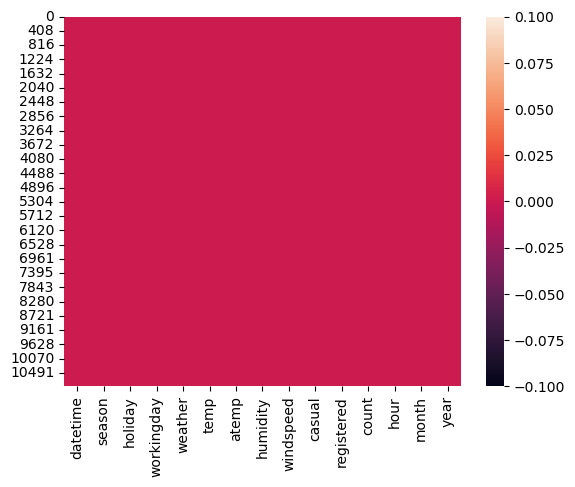

In [21]:
sns.heatmap(df.isnull())

as we can see there is no null values

# Correlation between two variable

In [22]:
round(df.corr(),2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
season,1.00,0.03,-0.01,0.01,0.26,0.27,0.19,-0.15,0.10,0.17,0.17,-0.01,0.97,-0.01
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.00,0.00,0.01,0.05,-0.01,0.01,0.00,0.00,0.02
workingday,-0.01,-0.25,1.00,0.03,0.02,0.02,-0.01,0.02,-0.33,0.09,-0.02,-0.00,-0.01,-0.01
weather,0.01,-0.01,0.03,1.00,-0.05,-0.05,0.41,0.01,-0.13,-0.11,-0.13,-0.02,0.01,-0.01
temp,0.26,0.00,0.02,-0.05,1.00,0.99,-0.05,-0.02,0.47,0.30,0.39,0.13,0.26,0.04
atemp,0.27,-0.00,0.02,-0.05,0.99,1.00,-0.03,-0.06,0.46,0.30,0.38,0.13,0.27,0.04
humidity,0.19,0.00,-0.01,0.41,-0.05,-0.03,1.00,-0.32,-0.34,-0.27,-0.32,-0.27,0.21,-0.07
windspeed,-0.15,0.01,0.02,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.10,0.11,0.15,-0.15,-0.02
casual,0.10,0.05,-0.33,-0.13,0.47,0.46,-0.34,0.09,1.00,0.51,0.72,0.30,0.10,0.11
registered,0.17,-0.01,0.09,-0.11,0.30,0.30,-0.27,0.10,0.51,1.00,0.97,0.41,0.17,0.21


we can also see this graphically by using heatmap from seaborn library

<AxesSubplot:>

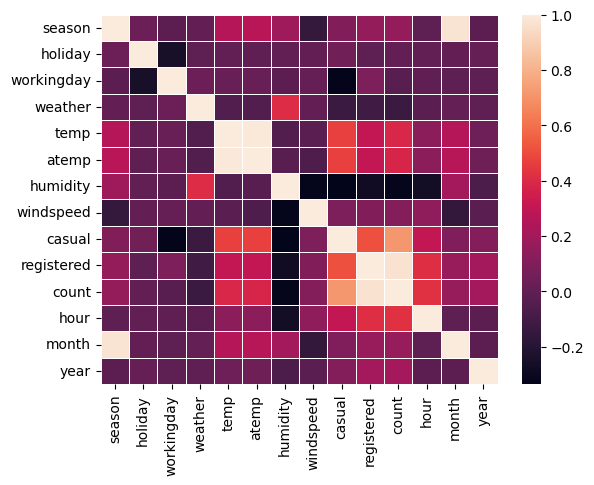

In [23]:
sns.heatmap(df.corr(),linewidths=0.5)

We can see for the "count"
* there is strong positive correlation between count with "casual(0.72)" and "rental(0.91)" which is obvious as it is sum of those two variables
* there is also somewhat a strong positive relation between "count" and "temp(0.39)/atemp(0.38)" which suggest that as the temp increase, the count also increase
* there is somewhat a strong positive relation (0.43) between "count" and "hour"
* "count" and "humidity" has a negative correleation of -0/32. This means that as humidity increase, the bike rental count tends to decrease
* This is ofcourse just a first glance,we have to perform various statistical tests in order to actually confirm our findings

# Data visualization

In [24]:
px.pie(df,names='season')

In [25]:
px.pie(df,names='workingday')

* Top 5 months when demand/use is maxmim

In [26]:
hour_sum=df.groupby('hour')['count'].sum().sort_values(ascending=False)
hour_sum[:5]

hour
16    140123
17    139138
19    138353
18    135258
8     111203
Name: count, dtype: int64

In [27]:
month_sum=df.groupby('month')['count'].sum().sort_values(ascending=False)
month_sum[:5]

month
7     194177
6     189028
8     182855
5     178752
10    174659
Name: count, dtype: int64

# Hypothesis testing

## 1. Working Day has effect on number of electric cycles rented


* Null hypothesis(HO)=There is no much difference between "count" on "weekends/holidays" or "weekdays/non-holidays"
* Alternate Hypothesis (H1)= the count differs
* Significance value=0.05

In [28]:
workday=df[df['workingday']==1]
workday.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,1,2011
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,1,2011


In [29]:
non_workday=df[df['workingday']==0]
non_workday.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011


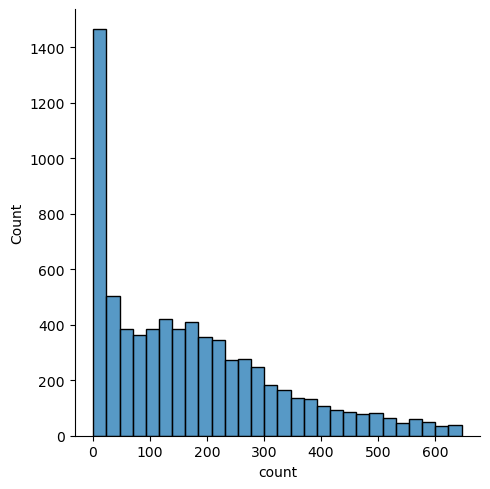

In [30]:
sns.displot(workday,x='count')

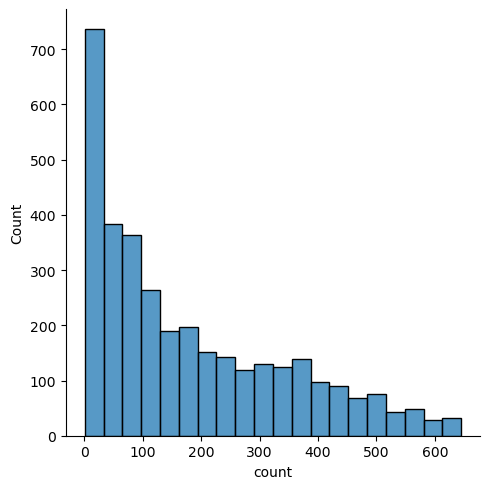

In [31]:
sns.displot(non_workday,x='count')

As we can see that the "count" distribution is right-skewed therefore we can use non-parametric test to test our hypothesis

In [33]:
mwu_stat,p_val=mannwhitneyu(workday['count'],non_workday['count'])

In [34]:
print("U statistic",mwu_stat)
print("P value",p_val)

U statistic 11998982.0
P value 0.08466110521914866


* As our P-value is 0.08 which is higher than significance value(0.05),we fail to reject our null hypothesis
* Thus we can say that there is not much difference in electric cycles rented on "weekends/holidays" or "weekdays/non-holidays

## 2. No. of cylce rented similar or different in different seasons

* Null Hypothesis(HO)=There is not much difference between no. of cycle rented similar or different in different seasons
* Alternative Hypothesis (H1)= There is significant difference between No. of cylce rented similar or different in different seans 
* Significance level=0.5

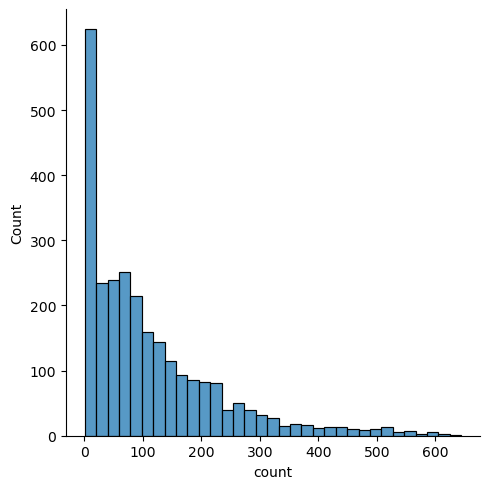

In [35]:
sns.displot(df[df['season']==1],x='count')

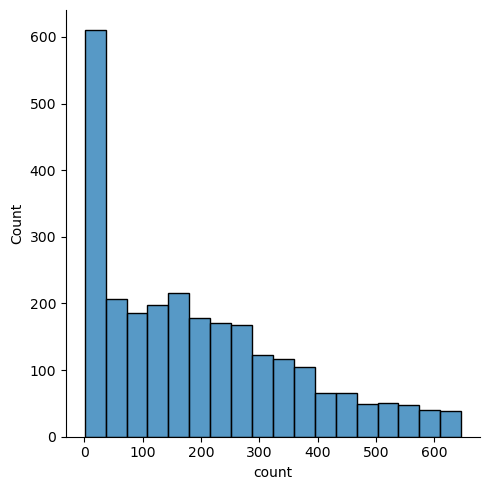

In [36]:
sns.displot(df[df['season']==2],x='count')


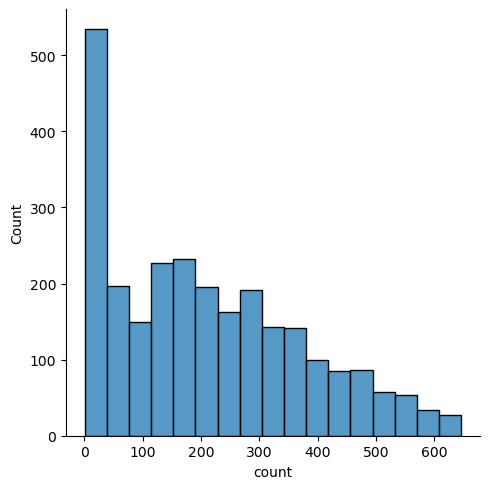

In [37]:
sns.displot(df[df['season']==3],x='count')


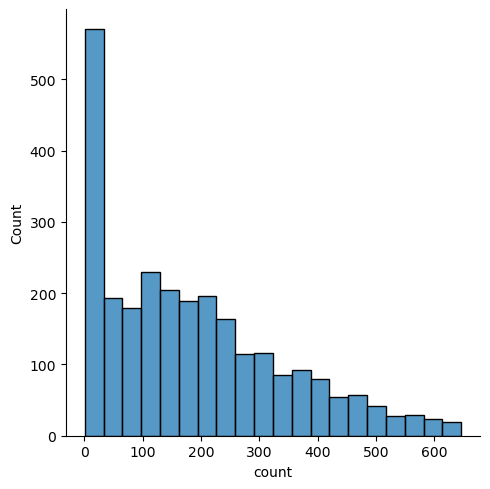

In [38]:
sns.displot(df[df['season']==4],x='count')


* Again this is not normal distribution so we can use a non-parameterized test here to test our hypothesis
* Here we are using Kruskal-Wallis test

In [40]:
h_stat,p_value=kruskal(df['count'][df['season']==1],
                       df['count'][df['season']==2],
                       df['count'][df['season']==3],
                       df['count'][df['season']==4]
                    )

In [41]:
print("H statistic vale: ", h_stat)
print("P Value: ", p_value)

H statistic vale:  619.3679817851395
P Value:  6.376253250003707e-134


* we can see that p-value is so much smaller than the significance Valued (0.05).Therefore, we can say that we have enough evidence to reject our null hypothesis and accept the alternative hypothesis 